<a href="https://colab.research.google.com/github/isaacbull/Data-Science-zikspot/blob/main/data_science_practice3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970


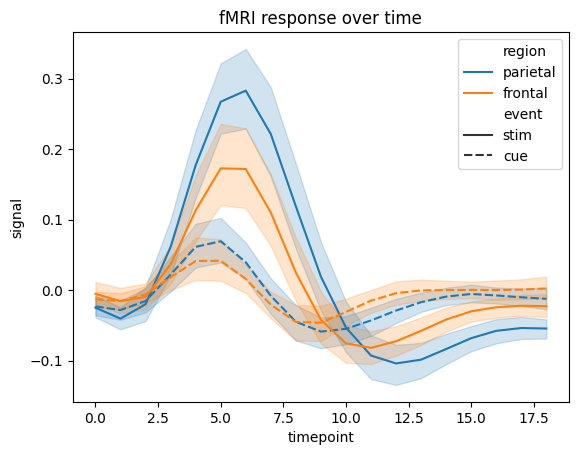

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the fMRI dataset
fmri = sns.load_dataset("fmri")

# Display the first few rows of the dataset
print(fmri.head())

# Plotting the data
sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri)
plt.title('fMRI response over time')
plt.show()


In [4]:

# List all available datasets
available_datasets = sns.get_dataset_names()
type(available_datasets)

list

In [5]:
available_datasets


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

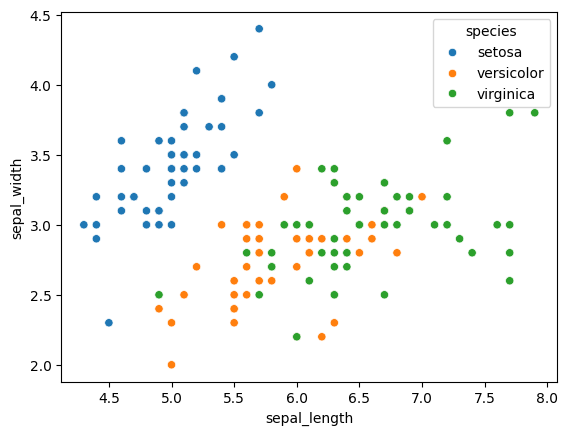

In [7]:
iris = sns.load_dataset('iris')
iris.head()
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')


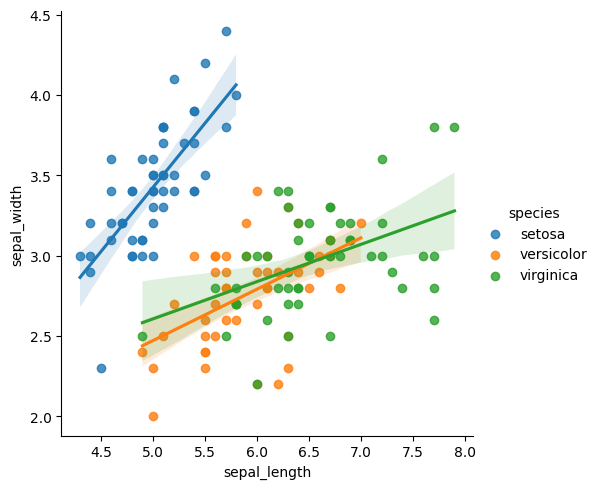

In [8]:
# prompt: create lmplots

import matplotlib.pyplot as plt
sns.lmplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
plt.show()


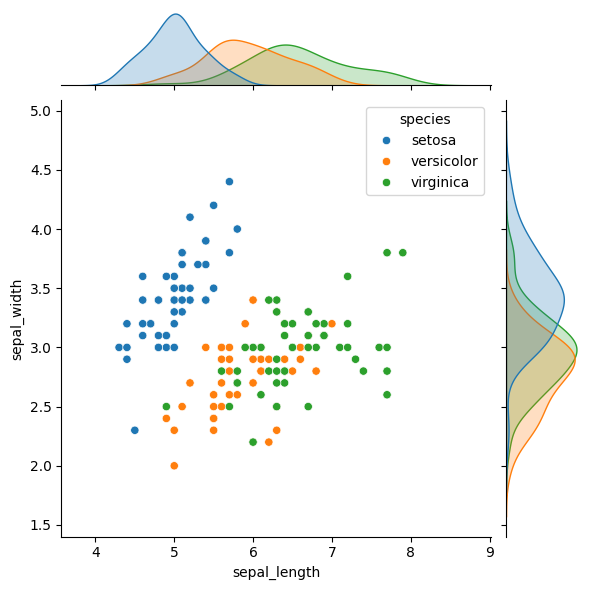

In [9]:
# prompt: create jointplot

import matplotlib.pyplot as plt
sns.jointplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
plt.show()


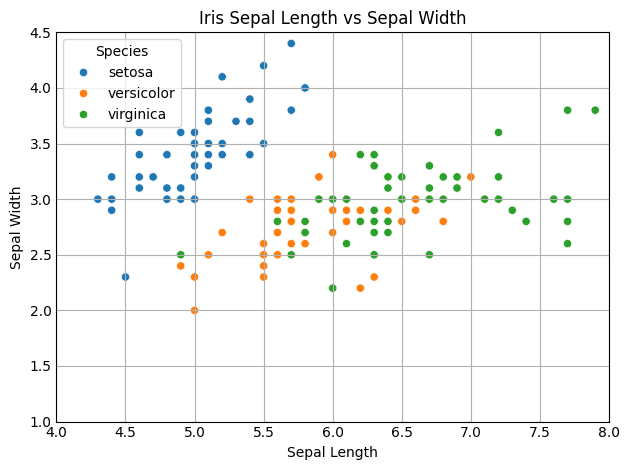

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes
fig, ax = plt.subplots()

# Load the dataset
iris = sns.load_dataset("iris")

# Create a scatter plot
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris, ax=ax)

# Set titles and labels
ax.set_title('Iris Sepal Length vs Sepal Width')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.legend(title='Species')
ax.grid(True)
ax.set_aspect('auto')
ax.set_xlim(4, 8)
ax.set_ylim(1, 4.5)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)



ax.tick_params(axis='both', which='both', length=0)
fig.tight_layout()
fig.savefig('iris_scatterplot.png', dpi=300)




# Display the plot
plt.show()


In [ ]:
# prompt: create donut plot using seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data = {'Category': ['A', 'B', 'C', 'D'],
        'Value': [20, 35, 15, 25]}

# Create a donut chart using matplotlib
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
labels = data['Category']
sizes = data['Value']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'] # Customize colors as needed

# Create the pie chart with a white circle in the center for a donut effect
my_circle = plt.Circle( (0,0), 0.7, color='white')

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
p = plt.gcf()
p.gca().add_artist(my_circle)

# Add a title and display the chart
plt.title('Donut Chart')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()

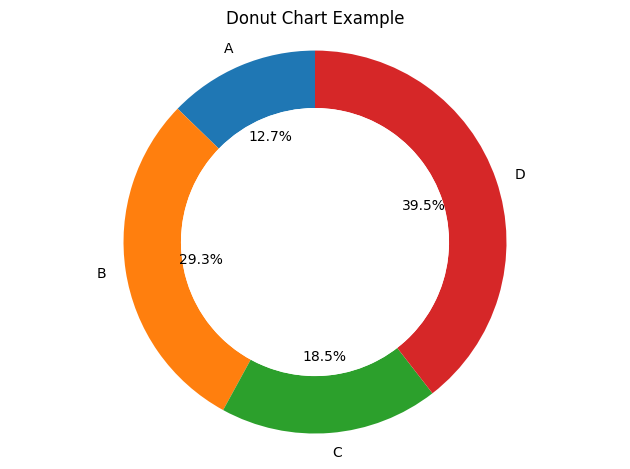

In [11]:
# prompt: create donut plot using matplotlib

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
labels = ['A', 'B', 'C', 'D']
sizes = [100, 230, 145, 310]

# Create the donut chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

# Add a circle at the center to create the donut effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.title('Donut Chart Example')
plt.tight_layout()
plt.show()


In [34]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [35]:
# prompt: use the pandas groupby method

# Group data by 'region' and calculate the mean signal for each region
region_means = fmri.groupby('region')['signal'].mean()
region_means

,signal
region,
frontal,0.001298
parietal,0.005781


In [53]:
import pandas as pd

data = {
    'store': ['A', 'A', 'B', 'B', 'C', 'C'],
    'product': ['apple', 'banana', 'apple', 'banana', 'apple', 'banana'],
    'sales': [100, 150, 80, 200, 90, 300],
    'expenses': [21, 33, 98, 28, 67, 45]

}


df = pd.DataFrame(data)

df



,store,product,sales,expenses
0,A,apple,100,21
1,A,banana,150,33
2,B,apple,80,98
3,B,banana,200,28
4,C,apple,90,67
5,C,banana,300,45


In [49]:
# Group by store and calculate total sales for each store
total_sales_per_store = df.groupby('store')['sales'].sum()
print(total_sales_per_store)

store
A    250
B    280
C    390
Name: sales, dtype: int64


<Axes: ylabel='store'>

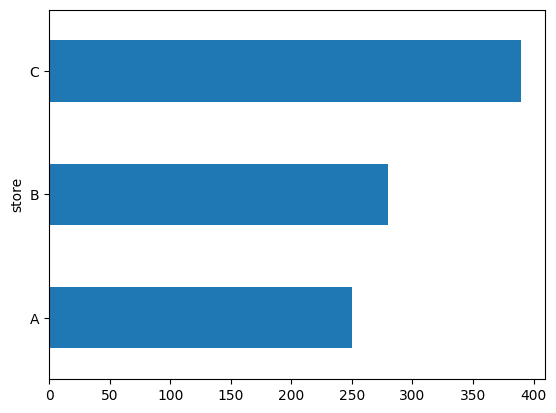

In [38]:
total_sales_per_store.plot(kind='barh')
#

In [55]:
# prompt: create a pivot table and add a total column

pivot_table = pd.pivot_table(df, values=['sales', 'expenses'], index=['store'], aggfunc='sum')

# Add a total column
pivot_table['profit'] = pivot_table['sales'] - pivot_table['expenses']

pivot_table

,expenses,sales,profit
store,,,
A,54,250,196
B,126,280,154
C,112,390,278


In [56]:
# prompt: use the pandas apply method

# Apply a function to calculate the profit for each store
df['profit'] = df.apply(lambda row: row['sales'] - row['expenses'], axis=1)

df

,store,product,sales,expenses,profit
0,A,apple,100,21,79
1,A,banana,150,33,117
2,B,apple,80,98,-18
3,B,banana,200,28,172
4,C,apple,90,67,23
5,C,banana,300,45,255


In [58]:
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})
df


,A,B
0,1,4
1,2,5
2,3,6


In [60]:
# Apply a function to each column
result = df.apply(lambda col: col.max() - col.min(), axis=0)
print(result)


A    2
B    2
dtype: int64


In [61]:
# prompt: check for null

# Check for null values in the 'fmri' DataFrame
print(fmri.isnull().sum())

# Check for null values in the 'iris' DataFrame
print(iris.isnull().sum())

# Check for null values in the 'df' DataFrame
print(df.isnull().sum())

subject      0
timepoint    0
event        0
region       0
signal       0
dtype: int64
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
A    0
B    0
dtype: int64


In [63]:
import numpy as np
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
dot_product = np.dot(arr1, arr2)


In [64]:
dot_product.

32

In [65]:
from functools import reduce

# Function to sum two numbers
def add(x, y):
    return x + y

numbers = [1, 2, 3, 4, 5]
total = reduce(add, numbers)
print(total)  # Output: 15


15


In [66]:
from collections import namedtuple

# Define a namedtuple class
Person = namedtuple('Person', ['name', 'age'])

# Create an instance of Person
p = Person(name='John', age=30)

# Access elements using attributes
print(p.name) # John
print(p.age) # 30

John
30


In [68]:
from collections import Counter, defaultdict, OrderedDict, deque, ChainMap, UserDict, UserList

In [69]:
# prompt: show an example of the use of all the methods imported from the collections module

from collections import Counter, defaultdict, OrderedDict, deque, ChainMap, UserDict, UserList

# Counter: count hashable objects
cnt = Counter('abracadabra')
print("Counter:", cnt)
print("Most common:", cnt.most_common(2)) # 2 most common

# defaultdict: provides default value for missing keys
dd = defaultdict(int) # default value is 0
dd['a'] += 1
print("Defaultdict:", dd)

# OrderedDict: remembers the order in which items are inserted
od = OrderedDict()
od['a'] = 1
od['b'] = 2
print("OrderedDict:", od)

# deque: double-ended queue
dq = deque([1,2,3])
dq.appendleft(0)
dq.append(4)
print("Deque:", dq)

# ChainMap: groups multiple mappings
dict1 = {'a': 1, 'b': 2}
dict2 = {'c': 3, 'd': 4}
cm = ChainMap(dict1, dict2)
print("ChainMap:", cm)

# UserDict: wrapper around dictionary objects
ud = UserDict({'a':1})
ud['b'] = 2
print("UserDict:", ud)


# UserList: wrapper around list objects
ul = UserList([1,2,3])
ul.append(4)
print("UserList:", ul)

Counter: Counter({'a': 5, 'b': 2, 'r': 2, 'c': 1, 'd': 1})
Most common: [('a', 5), ('b', 2)]
Defaultdict: defaultdict(<class 'int'>, {'a': 1})
OrderedDict: OrderedDict([('a', 1), ('b', 2)])
Deque: deque([0, 1, 2, 3, 4])
ChainMap: ChainMap({'a': 1, 'b': 2}, {'c': 3, 'd': 4})
UserDict: {'a': 1, 'b': 2}
UserList: [1, 2, 3, 4]


In [ ]:
# prompt: import most popular methods from functools and show example of use

from functools import partial, lru_cache, singledispatch

# Partial: freeze arguments of a function
def power(base, exponent):
  return base ** exponent

square = partial(power, exponent=2)
print(square(5))  # Output: 25


# lru_cache: memoize function calls
@lru_cache(maxsize=None)
def fibonacci(n):
  if n < 2:
    return n
  return fibonacci(n-1) + fibonacci(n-2)

print(fibonacci(10)) # Output: 55


# singledispatch: generic function
@singledispatch
def my_function(arg):
    print("Default:", arg)

@my_function.register(int)
def _(arg):
    print("Integer:", arg)

@my_function.register(str)
def _(arg):
    print("String:", arg)

my_function(5) # Output: Integer: 5
my_function("hello") # Output: String: hello
my_function(3.14) # Output: Default: 3.14